In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.linear_model import LinearRegression

In [41]:
adv_data = pd.read_excel("re.xlsx")

In [42]:
print('head:',adv_data.head(),'\nShape:',adv_data.shape)

head:      身价  平均年龄  平均身高     score
0  4110    27   181  3.523036
1  2944    28   181  2.046407
2  2631    27   186  1.900293
3  2601    27   183  1.721571
4  2303    28   184  1.559659 
Shape: (20, 4)


In [43]:
#数据描述
print(adv_data.describe())
#缺失值检验
print(adv_data[adv_data.isnull()==True].count())

                身价       平均年龄        平均身高      score
count    20.000000  20.000000   20.000000  20.000000
mean   1521.950000  27.700000  182.850000   1.202593
std     999.080444   1.080935    1.631112   0.769690
min     393.000000  26.000000  180.000000   0.345839
25%     737.500000  27.000000  181.750000   0.591756
50%    1351.500000  27.500000  183.000000   1.097006
75%    2078.000000  28.000000  184.000000   1.600137
max    4110.000000  31.000000  186.000000   3.523036
身价       0
平均年龄     0
平均身高     0
score    0
dtype: int64


In [44]:
import matplotlib.pyplot as plt

In [45]:


def data_norm(df,*cols):
    df_n = df.copy()
    for col in cols:
        ma = df_n[col].max()
        mi = df_n[col].min()
        df_n[col + '_n'] = (df_n[col] - mi) / (ma - mi)
    return(df_n)
# 创建函数，标准化数据

adv_data = data_norm(adv_data,'身价')
adv_data = data_norm(adv_data,'平均年龄')
adv_data = data_norm(adv_data,'平均身高')
adv_data.head(5)

,身价,平均年龄,平均身高,score,身价_n,平均年龄_n,平均身高_n
0,4110,27,181,3.523036,1.000000,0.2,0.166667
1,2944,28,181,2.046407,0.686306,0.4,0.166667
2,2631,27,186,1.900293,0.602098,0.2,1.000000
3,2601,27,183,1.721571,0.594027,0.2,0.500000
4,2303,28,184,1.559659,0.513855,0.4,0.666667


In [46]:
df=adv_data[['身价_n','平均年龄_n','平均身高_n','score']]

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 40836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

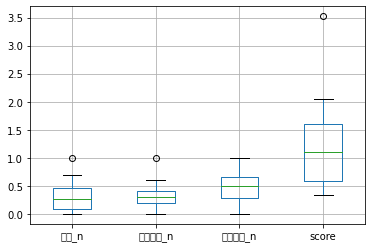

            身价_n    平均年龄_n    平均身高_n     score
身价_n    1.000000 -0.348182 -0.167239  0.967093
平均年龄_n -0.348182  1.000000 -0.325379 -0.355156
平均身高_n -0.167239 -0.325379  1.000000 -0.174202
score   0.967093 -0.355156 -0.174202  1.000000


In [47]:
df.boxplot()
plt.savefig("boxplot.jpg")
plt.show()
##相关系数矩阵 r(相关系数) = x和y的协方差/(x的标准差*y的标准差) == cov（x,y）/σx*σy
#相关系数0~0.3弱相关0.3~0.6中等程度相关0.6~1强相关
print(df.corr())

In [48]:
from __future__ import division
import seaborn as sns

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda

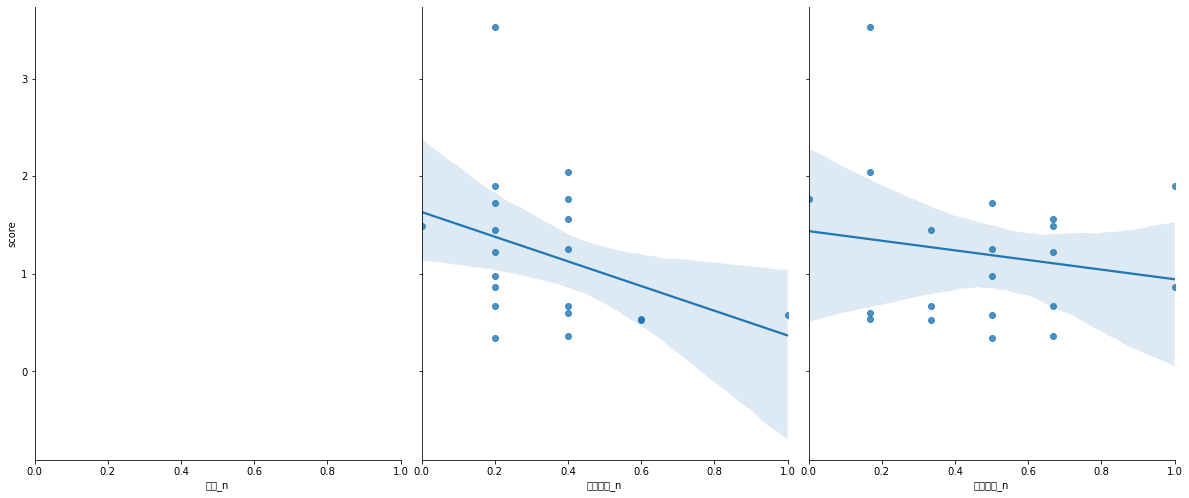

In [49]:
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
sns.pairplot(df, x_vars=['身价_n','平均年龄_n','平均身高_n'], y_vars='score', size=7, aspect=0.8,kind = 'reg')
plt.savefig("pairplot.jpg")
plt.show()

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 40836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

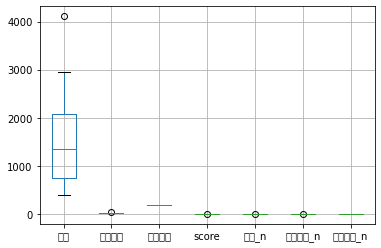

              身价      平均年龄      平均身高     score      身价_n    平均年龄_n    平均身高_n
身价      1.000000 -0.348182 -0.167239  0.967093  1.000000 -0.348182 -0.167239
平均年龄   -0.348182  1.000000 -0.325379 -0.355156 -0.348182  1.000000 -0.325379
平均身高   -0.167239 -0.325379  1.000000 -0.174202 -0.167239 -0.325379  1.000000
score   0.967093 -0.355156 -0.174202  1.000000  0.967093 -0.355156 -0.174202
身价_n    1.000000 -0.348182 -0.167239  0.967093  1.000000 -0.348182 -0.167239
平均年龄_n -0.348182  1.000000 -0.325379 -0.355156 -0.348182  1.000000 -0.325379
平均身高_n -0.167239 -0.325379  1.000000 -0.174202 -0.167239 -0.325379  1.000000


In [50]:
adv_data.boxplot()
plt.savefig("boxplot1.jpg")
plt.show()
##相关系数矩阵 r(相关系数) = x和y的协方差/(x的标准差*y的标准差) == cov（x,y）/σx*σy
#相关系数0~0.3弱相关0.3~0.6中等程度相关0.6~1强相关
print(adv_data.corr())

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda

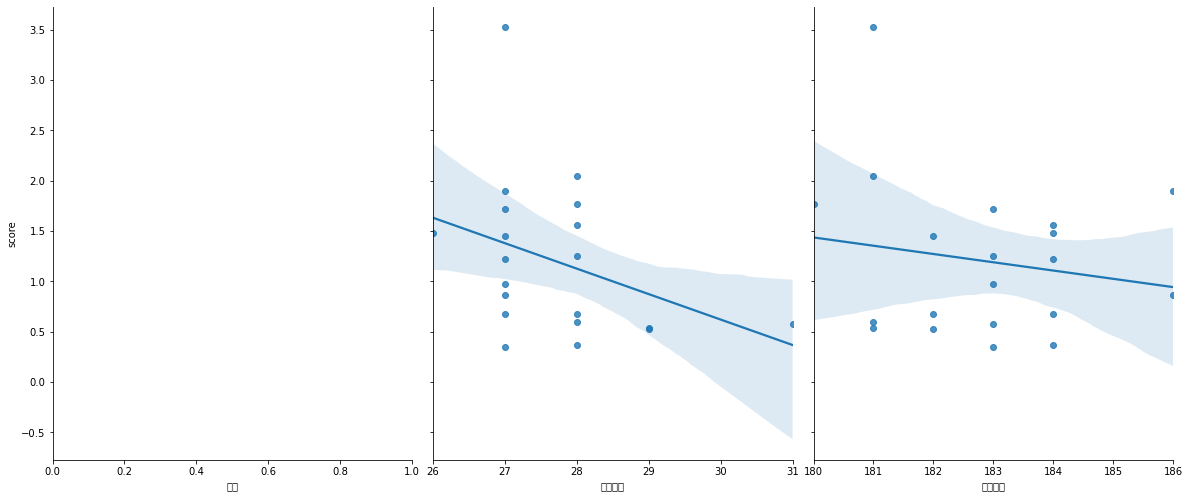

In [51]:
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
sns.pairplot(adv_data, x_vars=['身价','平均年龄','平均身高'], y_vars='score', size=7, aspect=0.8,kind = 'reg')
plt.savefig("pairplot2.jpg")
plt.show()

,身价,平均年龄,平均身高,score,身价_n,平均年龄_n,平均身高_n
0,4110,27,181,3.523036,1.000000,0.2,0.166667
1,2944,28,181,2.046407,0.686306,0.4,0.166667
2,2631,27,186,1.900293,0.602098,0.2,1.000000
3,2601,27,183,1.721571,0.594027,0.2,0.500000
4,2303,28,184,1.559659,0.513855,0.4,0.666667
5,2003,27,182,1.448298,0.433145,0.2,0.333333
6,1910,28,180,1.764611,0.408125,0.4,0.000000
7,1622,26,184,1.484506,0.330643,0.0,0.666667
8,1544,27,184,1.218403,0.309658,0.2,0.666667
9,1504,27,183,0.975610,0.298897,0.2,0.500000


In [59]:

import sklearn
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(adv_data[['身价','平均年龄','平均身高']],adv_data.score,train_size=.80)
 
print("原始数据特征:",adv_data[['身价','平均年龄','平均身高']].shape,
      ",训练数据特征:",X_train.shape,
      ",测试数据特征:",X_test.shape)
 
print("原始数据标签:",adv_data.score.shape,
      ",训练数据标签:",Y_train.shape,
      ",测试数据标签:",Y_test.shape)

原始数据特征: (20, 3) ,训练数据特征: (16, 3) ,测试数据特征: (4, 3)
原始数据标签: (20,) ,训练数据标签: (16,) ,测试数据标签: (4,)


In [60]:
model = LinearRegression()
 
model.fit(X_train,Y_train)
 
a  = model.intercept_#截距
 
b = model.coef_#回归系数
 
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 -0.21694995183743981 ,回归系数： [ 0.00077575 -0.00745624  0.00244002]
